In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten


In [7]:
x_train = np.loadtxt('input.csv',delimiter=',')
y_train = np.loadtxt('labels.csv',delimiter=',')

x_test = np.loadtxt('input_test.csv',delimiter=',')
y_test = np.loadtxt('labels_test.csv',delimiter=',')


In [12]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
print("shape of x_train :",x_train.shape)
print("shape of y_train :",y_train.shape)
print("shape of x_test :",x_test.shape)
print("shape of x_test :",y_test.shape)


shape of x_train : (2000, 100, 100, 3)
shape of y_train : (2000, 1)
shape of x_test : (400, 100, 100, 3)
shape of x_test : (400, 1)


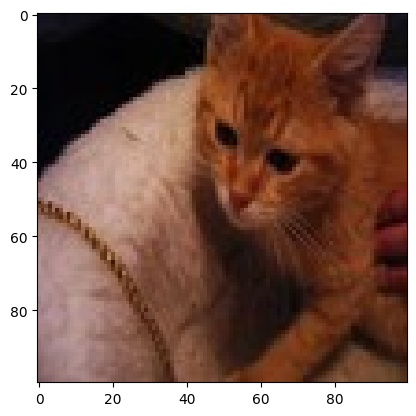

In [19]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [21]:
model =  Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape =(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu',),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.fit(x_train , y_train , epochs=5 , batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9080 - loss: 0.2261
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.9362 - loss: 0.1673
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.9661 - loss: 0.1123
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.9728 - loss: 0.0900
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.9873 - loss: 0.0661


In [53]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6419 - loss: 1.2419


[1.056273341178894, 0.6825000047683716]

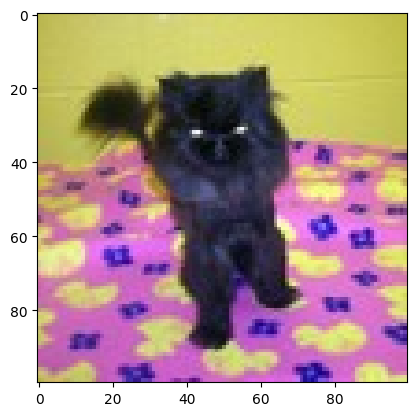

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Our model says it is a : Cat


In [54]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()
y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
#y_pred = y_pred > 0.5
if (y_pred <= 0.5):
    pred = 'Dog'
    print('Our model says it is a :',pred)
else:
    pred = 'Cat'
    print('Our model says it is a :',pred)